In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

from retina_face_detector import RetinaFaceDetector
from utils.align_trans import get_reference_facial_points, warp_and_crop_face

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
detector = RetinaFaceDetector('mobilenet', device)

RetinaFace loaded


Finished 'detect' in 0.4454 secs
number of detected faces:  24


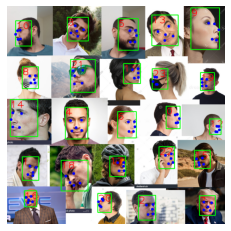

In [3]:
image_path = "input/faces.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
original_image = image.copy()

bounding_boxes, faces, landmarks = detector.detect(image)
print('number of detected faces: ', len(faces))

bounding_boxes = np.array(bounding_boxes).astype(int)
landmarks = np.array(landmarks).astype(int)

for i, bbox in enumerate(bounding_boxes):
    cv2.putText(image, str(i), (bbox[0], bbox[1] + 50), cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 4)
    for j, landmark in enumerate(landmarks[i]):
        cv2.circle(image, (landmark[0], landmark[1]), 8, (255, 0, 0), -1)
#         cv2.putText(image, str(j), (landmark[0], landmark[1]), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 4, cv2.LINE_AA)

cv2.imwrite('output/test.jpg', image)
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
for i, bbox in enumerate(bounding_boxes):
    landmark = landmarks[i]
    if landmark[0][0] <= landmark[2][0] <= landmark[1][0]:
        print(f'face {i} is frontal')
    else:
        print(f'face {i} is side')

face 0 is side
face 1 is frontal
face 2 is frontal
face 3 is frontal
face 4 is frontal
face 5 is side
face 6 is side
face 7 is frontal
face 8 is frontal
face 9 is side
face 10 is side
face 11 is side
face 12 is side
face 13 is frontal
face 14 is side
face 15 is frontal
face 16 is frontal
face 17 is frontal
face 18 is frontal
face 19 is frontal
face 20 is side
face 21 is frontal
face 22 is frontal
face 23 is side


In [ ]:
image_landmarks = original_image.copy()

for i, bbox in enumerate(bounding_boxes):
    for landmark in landmarks[i]:
        cv2.circle(image_landmarks, (landmark[0], landmark[1]), 8, (0, 255, 0), -1)

In [4]:
landmark = landmarks[i]
reference = get_reference_facial_points(default_square=True)
warped_face, face_pts = warp_and_crop_face(np.array(original_image), landmark, reference, crop_size=(112, 112))

print(face_pts)

plt.axis('off')
plt.imshow(cv2.cvtColor(warped_face, cv2.COLOR_BGR2RGB))

NameError: name 'landmarks' is not defined

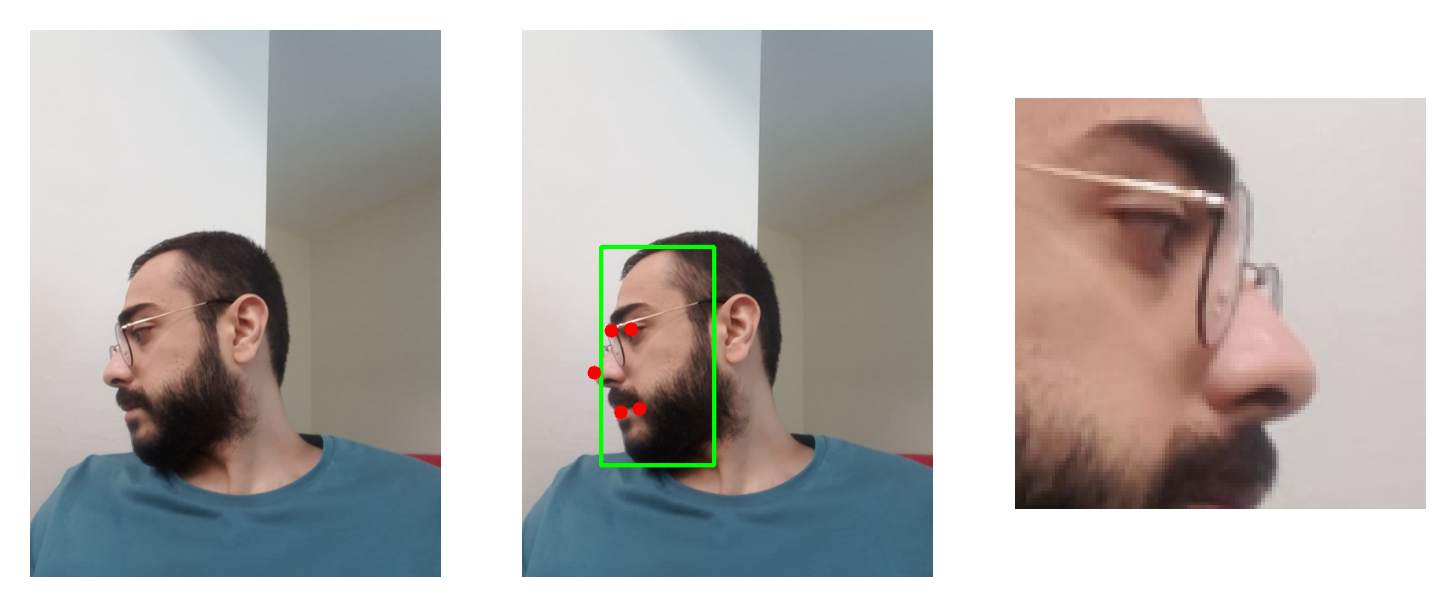

In [6]:
fig, axs = plt.subplots(1, 3,  dpi= 300)
# fig.suptitle('Face Detection and Alignment')

axs[0].axis('off')
axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[2].axis('off')
axs[2].imshow(cv2.cvtColor(warped_face, cv2.COLOR_BGR2RGB))